(0.0, 2.718281828459045)

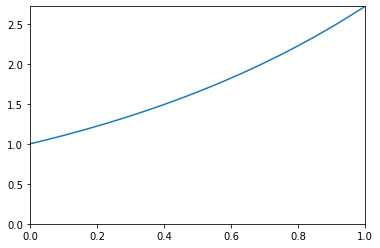

In [1]:
# load...
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
# prepare
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x))
plt.xlim([0,1])
plt.ylim([0, np.exp(1)])

Compute the analytic solution.

In [2]:
from sympy import symbols, integrate, exp
x = symbols('x')
expr = integrate(exp(x), (x,0,1))
expr.evalf()

1.71828182845905

We can use classic quadrature too.

In [3]:
from scipy import integrate
I, err = integrate.quad(exp, 0, 1)
I

1.7182818284590453

Here is the Monte Carlo integration for increasing values of $N$ from $10$ to $10^8.$

In [4]:
np.random.seed(1956)
err = []
for n in 10**np.array([1,2,3,4,5,6,7,8]):
    x  = np.random.uniform(0, 1, n)
    In = np.mean(np.exp(x))
    e  = abs(In - I)
    err += [e]
    print('%10d %.6f %.6f' % (n, In, e))

        10 1.821552 0.103271
       100 1.629035 0.089247
      1000 1.709101 0.009181
     10000 1.713357 0.004924
    100000 1.718544 0.000262
   1000000 1.718931 0.000649
  10000000 1.718203 0.000078
 100000000 1.718304 0.000022


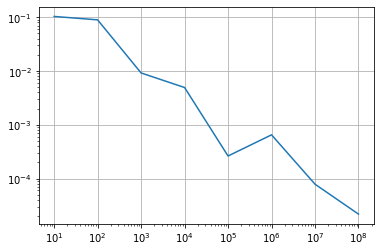

In [5]:
plt.loglog(10**np.array([1,2,3,4,5,6,7,8]),err)
plt.grid(True)

This is a single realization and if repeated, will give a different convergence curve.
To estimate the number of iterations needed for convergence to a desired precision, we need to monitor the variance over a large number of realizations. Then we can construct confidence intervals that are useful for decision making.

For this, let us consider the strongly oscillatory function
$$
 f(x) = x \cos \alpha x + \sin \beta x, \quad 0 \le x \le 1,
$$
with $\alpha = 71$ and $\beta = 13.$

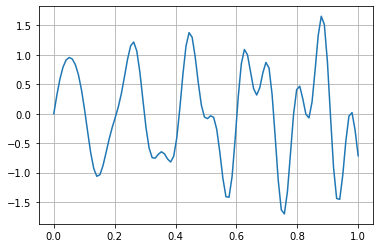

In [6]:
def f(x):
    return x*np.cos(71*x) + np.sin(31*x)
# plot
x = np.linspace(0,1,100)
plt.plot(x,f(x))
plt.grid(True)

A single MC integration gives the following estimate.

In [7]:
n = 100
x = f(np.random.random(n))
I = (1.0/n)*np.sum(x)
I

0.09077866260867058

Now we perform $1000$ realizations and compute the $95\%$ confidence interval.

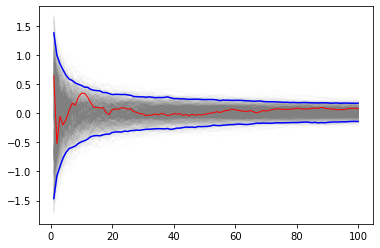

In [8]:
n = 100
reps = 1000

x  = f(np.random.random((n, reps)))
In = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(In, [2.5, 97.5], axis=1)

plt.plot(np.arange(1, n+1), In, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), In[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

If the computation of $1000$ replicates is too expensive, we can use a bootstrap to obtain the confidence interval.

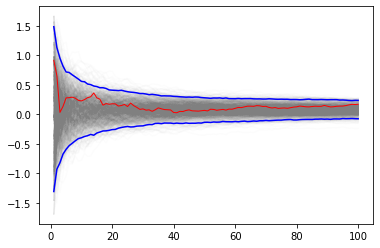

In [9]:
xb = np.random.choice(x[:,0], (n, reps), replace=True)
Ib = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(Ib, [2.5, 97.5], axis=1)

plt.plot(np.arange(1, n+1)[:, None], Ib, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), Ib[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')